In [2]:
# Импортируем библиотеки NumPy и pandas
import numpy as np
import pandas as pd
import math

# Импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Импортируем библиотеку datetime для работы с датами
import datetime

# Отключаем предупреждения
import warnings
warnings.filterwarnings('ignore')

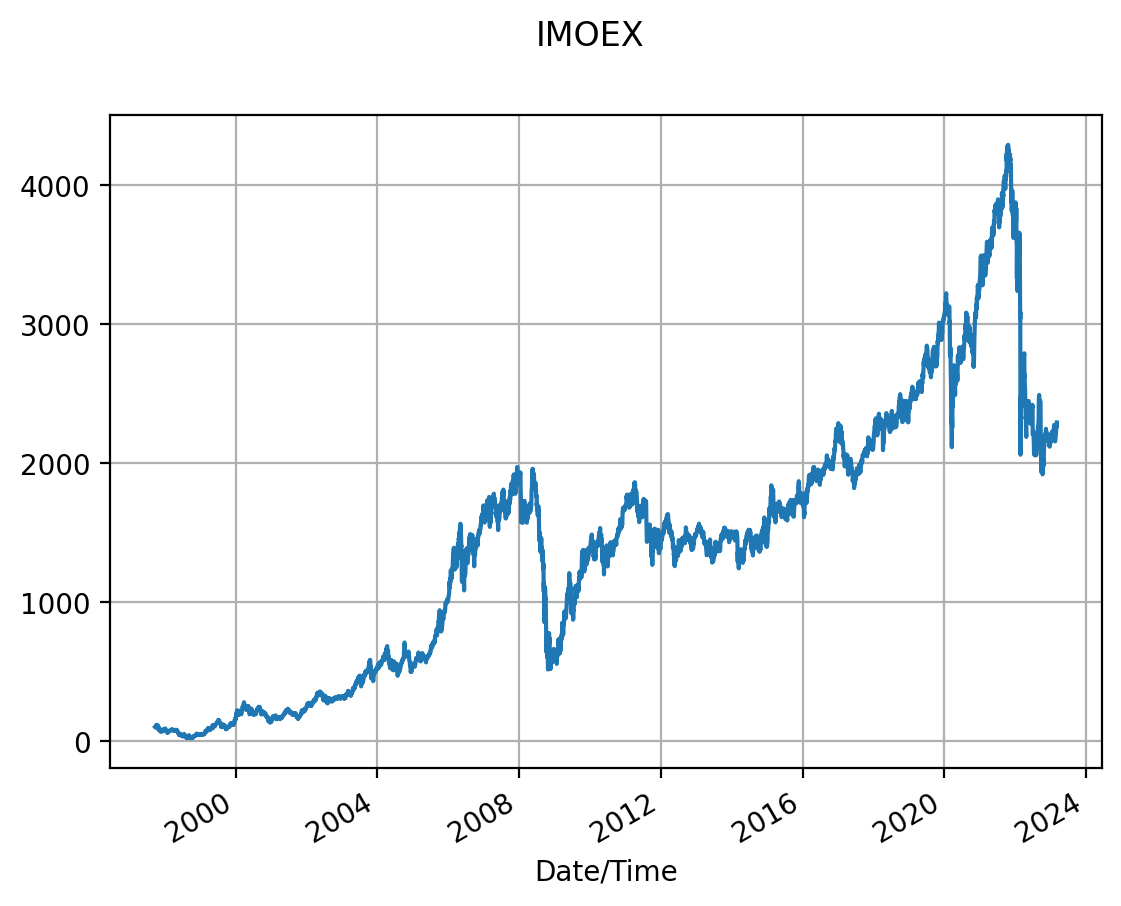

In [21]:


# Загружаем данные
used_cars = pd.read_csv(
    'imoex.csv', 
    header=0, index_col=0, parse_dates=['Date/Time'] , usecols=['Date/Time', 'price'])

# Визуализируем временной ряд
fig = plt.figure()
fig.suptitle('IMOEX')
used_cars['price'].plot()
plt.grid()
plt.show()

In [22]:
used_cars

,price
Date/Time,
1997-09-22,100.00000
1997-09-23,100.67000
1997-09-24,99.94000
1997-09-25,99.46000
1997-09-26,98.87000
...,...
2023-02-28,2253.15991
2023-03-01,2279.64990
2023-03-02,2254.30005


In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

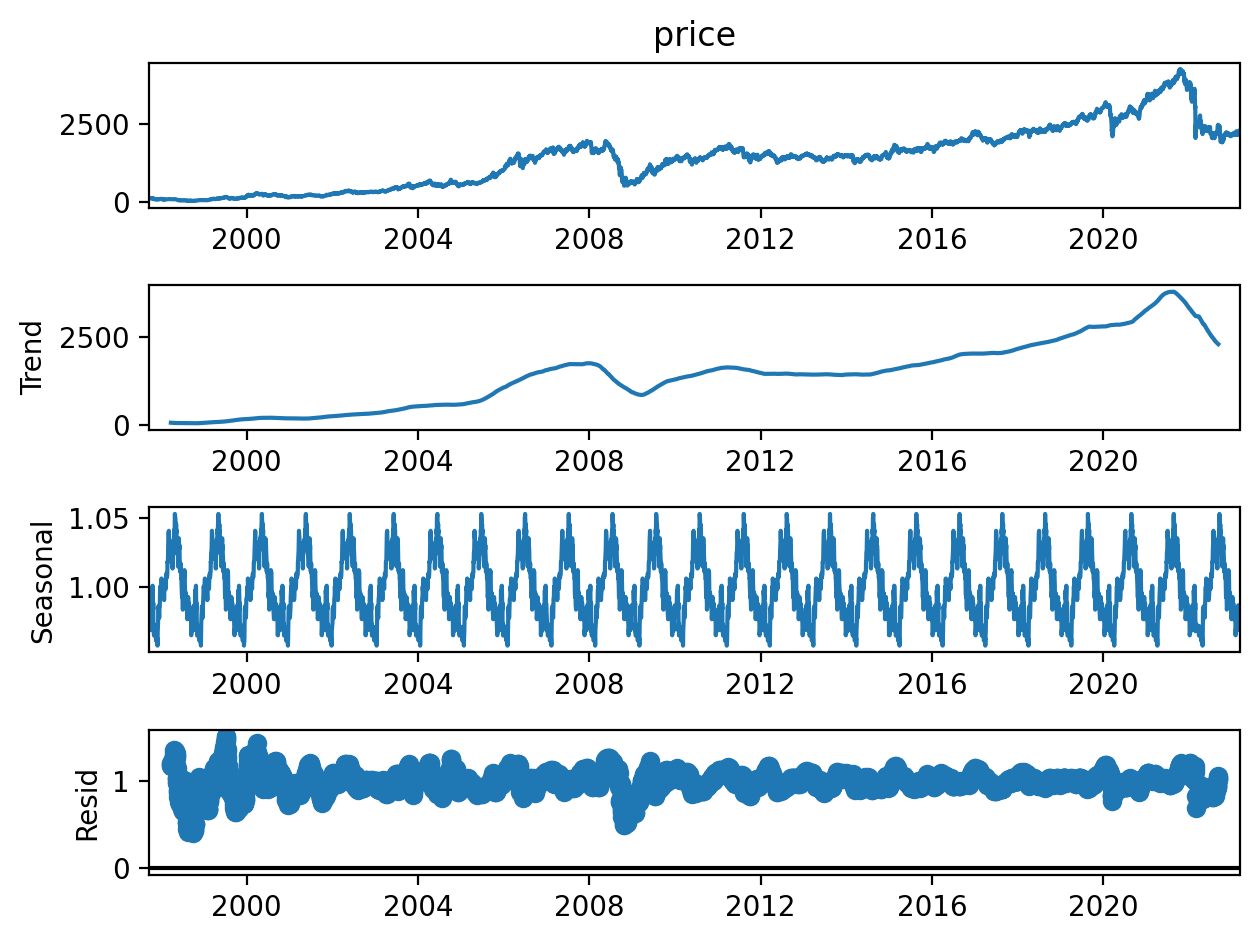

In [46]:
result = seasonal_decompose(
    used_cars['price'], 
    model='multiplicative',
    period=252)

result.plot();

In [48]:
seas = pd.DataFrame(result.seasonal)
seas

,seasonal
Date/Time,
1997-09-22,0.977023
1997-09-23,0.974166
1997-09-24,0.974546
1997-09-25,0.977955
1997-09-26,0.973433
...,...
2023-02-28,0.983517
2023-03-01,0.981880
2023-03-02,0.982092


In [49]:
seas.to_csv('imoex_seas.csv')